In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Greičio integravimas Euler ir RK4 metodais
Pradiniu laiko momentu $t_0=0$ kūnas buvo koordinačių pradžios taške $x_0=0$. Jei jo greičio nuo laiko priklausomybė yra $v(t)= t^4$, raskite ir pavaizduokite atsumo priklausomybė nuo laiko iki laiko momento $t_1=1$.

Pirmiausia nubrėžkime greičio grafiką

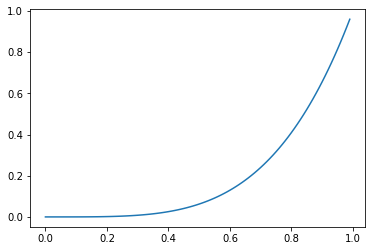

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


In [2]:
t=np.linspace(0,1, 100, endpoint=False)
def v(t):
    return t**4



plt.plot(t, v(t))
plt.show()
print(t)

Suskaičiuokite atsutmą laiko momentu t=1 naudojantis Eulerio metodu (Ats.:$v=t^n$, $x=1/(n+1)$)
$$x=x_0+v(t_0) dt$$
Kiek taškų reikia vieno procento tikslumui? 

In [3]:
t=np.linspace(0,1, 100, endpoint=False)
dt= t[1]-t[0]
#print(dt)

x0=0

for t0 in t:
    x0 = x0 + v(t0)*dt

ats=1/5
print(x0/ats)

0.9751666650000002


Suskaičiuokite atsutmą laiko momentu t=1 naudojantis Runge Kutta metodu
    $$v_1 = v(t_0,x_0) $$
    $$v_2 = v(t_0+ \frac{1}{2}dt,x_0+ \frac{dt}{2}v_1)$$
    $$v_3 = v(t_0+ \frac{1}{2}dt,x_0+ \frac{dt}{2}v_2)$$
    $$v_4 = v(t_0+ dt,x_0+ dt v_3)$$

$$x=x_0+(v_1+2v_2+2v_3+v_4) \frac{dt}{6}$$
Kiek taškų reikia vieno procento tikslumui? 

In [4]:
t=np.linspace(0,1, 100, endpoint=False)
dt= t[1]-t[0]
#print(dt)

x0=0

for t0 in t:
    v1 = v(t0)
    v2 = v(t0+dt/2)
    v3=  v(t0+dt/2)
    v4=  v(t0+dt)
    x0 = x0 + (v1 +2*v2+2*v3+v4)*dt/6

ats=1/5
print(x0/ats)

1.0000000004166667


## 2. Keplerio orbitos
Išspręskite žemės judėjimo aplink Saulę judėjimo lygtį. Saulės masė daug didesnė nei Žemės, todėl galite laikyti, kad ji nejuda koordinačių pradžios taške. Tinkamai pasirinkite vienetus.

\begin{align}
  \frac{dv^x}{dt} &= - \frac{x}{\sqrt{x^2+y^2}} \frac{GM}{r^2}\\
  \frac{dv^y}{dt} &= - \frac{y}{\sqrt{x^2+y^2}} \frac{GM}{r^2}\\
  \frac{dx}{dt}   &= v^x\\
  \frac{dy}{dt}   &= v^y
.\end{align}

- Išbandykite įvairias pradines sąlygas apskritiminei, eliptinei ir hiperbolinėms trajektorijoms.
- Nubrėžkite orbitų grafikus.
- Patikrinkite Eulerio ir RK4 metodų konvergavimą apskritiminei orbitai


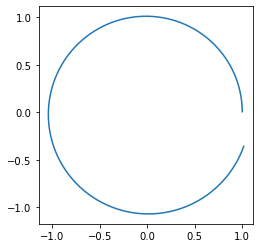

In [16]:
# Euler method

n=1000
t=np.linspace(0,2*np.pi, n, endpoint=False)
dt= t[1]-t[0]

xcord = np.zeros(n)
ycord = np.zeros(n)
tcord = np.zeros(n)
#print(dt)

x0=1
y0=0
vx0=0
vy0=1   # v = dx/dt = r0 /(r/vI) = vI

def pag(x,y, t):
    r=np.sqrt(x**2+y**2)
    ax = -x/r**3
    ay = -y/r**3
    return ax,ay

i=0
for t0 in t:
    
    ax0,ay0 = pag(x0,y0, t0)
    x0 = x0 + vx0*dt
    y0 = y0 + vy0*dt
    vx0 = vx0 + ax0*dt
    vy0 = vy0 + ay0*dt
    xcord[i]=x0
    ycord[i]=y0
    tcord[i]=t0
    i=i+1
    #v1 = v(t0)
    #v2 = v(t0+dt/2)
    #v3=  v(t0+dt/2)
    #v4=  v(t0+dt)
    #x0 = x0 + (v1 +2*v2+2*v3+v4)*dt/6
   
plt.plot(xcord,ycord)
ax=plt.gca()
ax.set_aspect("equal")
plt.show()

    

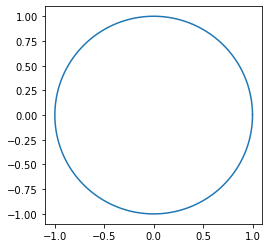

In [18]:
# RK4 method
n=1000
t=np.linspace(0,2*np.pi, n, endpoint=False)
dt= t[1]-t[0]

xcord = np.zeros(n)
ycord = np.zeros(n)
tcord = np.zeros(n)
#print(dt)

x0=1
y0=0
vx0=0
vy0=1   # v = dx/dt = r0 /(r/vI) = vI

def pag(x,y,t):
    r=np.sqrt(x**2+y**2)
    ax = -x/r**3
    ay = -y/r**3
    return ax,ay

i=0
for t0 in t:
    ax1,ay1 = pag(x0,y0,t0)
    vx1,vy1 = vx0,vy0
    
    ax2,ay2 = pag(x0+vx1*dt/2,y0+vy1*dt/2,t0+dt/2)
    vx2,vy2 = vx0+ax1*dt/2,vy0+ay1*dt/2
    
    ax3,ay3 = pag(x0+vx2*dt/2,y0+vy2*dt/2,t0+dt/2)
    vx3,vy3 = vx0+ax2*dt/2,vy0+ay2*dt/2

    ax4,ay4 = pag(x0+vx3*dt,y0+vy3*dt,t0+dt)
    vx4,vy4 = vx0+ax3*dt,vy0+ay3*dt
    
    vx0 = vx0+(ax1+2*ax2+2*ax3+ax4)*dt/6
    vy0 = vy0+(ay1+2*ay2+2*ay3+ay4)*dt/6
    x0 = x0+(vx1+2*vx2+2*vx3+vx4)*dt/6
    y0 = y0+(vy1+2*vy2+2*vy3+vy4)*dt/6
    
    xcord[i]=x0
    ycord[i]=y0
    tcord[i]=t0
    i=i+1

   
plt.plot(xcord,ycord)
ax=plt.gca()
ax.set_aspect("equal")
plt.show()


## 3. Trijų kūnų problema (sunkesnė)
Išspręskite Žemės judėjimo aplink Saulę judėjimo lygtį, su aplink Saulę besisukančiu Jupiteriu. Laikykite, kad Jupiteris juda apskritimu aplink Saulę ir nekreipkite dėmesio į Žemės įtaką jo orbitai.

Raskite chaotinio judėjimo pavyzdžių. Nubrėžkite orbitų pavyzdžių. Patikrinkite, kad orbitos yra skaitmeniškai stabilios (žingsniai pakankamai maži)

## 4. n-matės sferos tūris

Raskitė n–matės vienetinės sferos tūrį ($n=2$ -- skritulio plots, $n=3$ sferos tūris, $ V_n = \frac{\pi^{n/2}}{(n/2)!} $)

Pasinaudokite $r<1$ formule ir sumuokite tūrio elementus $[-1,1]^n$ kube.

- Kiek taškų reikia padalinti kubą vienodais tūriais, kad pasiektumėte vieno procento tikslumą? 
- Kiek taškų reikia, jei taškus pasirenkat atsitiktinai? Pvz, su np.random.rand
